# =========================
# Notebook 3: Sentiment Analysis (Synthetic)
# =========================


In [1]:
# Step 1: Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Step 2: Load cleaned dataset
df = pd.read_csv("/Users/sangsthitapanda/Desktop/L&T PROJECT/archive/employee_attrition_dataset_cleaned.csv")
df.head()

,employee_id,age,gender,marital_status,department,job_role,job_level,monthly_income,hourly_rate,years_at_company,...,overtime,project_count,average_hours_worked_per_week,absenteeism,work_environment_satisfaction,relationship_with_manager,job_involvement,distance_from_home,number_of_companies_worked,attrition
0,1,58,0,1,2,3,1,15488,28,15,...,0,6,54,17,4,4,4,20,3,0
1,2,48,0,1,4,1,5,13079,28,6,...,1,2,45,1,4,1,2,25,2,0
2,3,34,1,1,3,1,1,13744,24,24,...,1,6,34,2,3,4,4,45,3,0
3,4,27,0,0,3,3,1,6809,26,10,...,0,9,48,18,2,3,1,35,3,0
4,5,40,1,0,3,2,1,10206,52,29,...,0,3,33,0,4,1,3,44,3,0


In [3]:
# Step 3: Create sentiment score
# Using satisfaction-related features
df['sentiment_score'] = (
    df['job_satisfaction'] +
    df['work_life_balance'] +
    df['work_environment_satisfaction'] +
    df['relationship_with_manager']
) / 4


In [4]:

# Step 4: Map to sentiment label
def map_sentiment(score):
    if score >= 3:
        return "Positive"
    elif score == 2:
        return "Neutral"
    else:
        return "Negative"

df['sentiment_label'] = df['sentiment_score'].apply(map_sentiment)

In [6]:
# Step 5: Generate synthetic feedback text
def generate_text(label):
    if label == "Positive":
        return "I am happy with my job and work-life balance."
    elif label == "Neutral":
        return "My job is okay, not too good or bad."
    else:
        return "I am dissatisfied with my job and work-life balance."

df['feedback_text'] = df['sentiment_label'].apply(generate_text)

In [10]:
# Step 6: Save updated dataset
df.to_csv("/Users/sangsthitapanda/Desktop/L&T PROJECT/archive/employee_attrition_with_sentiment.csv", index=False)
print("✅ Sentiment features added & dataset saved.")

✅ Sentiment features added & dataset saved.


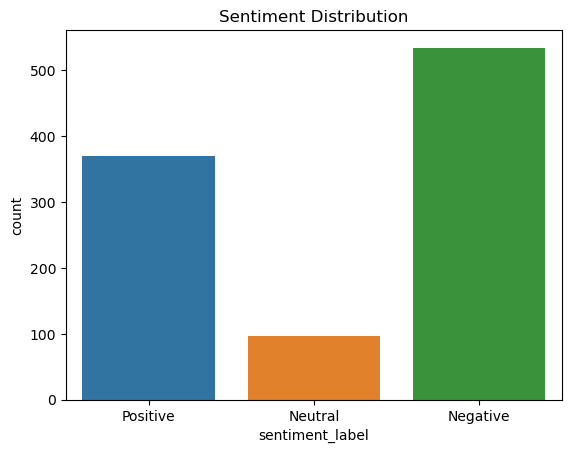

In [11]:
# Step 7: Visualize sentiment distribution
sns.countplot(x="sentiment_label", data=df, order=["Positive","Neutral","Negative"])
plt.title("Sentiment Distribution")
plt.show()

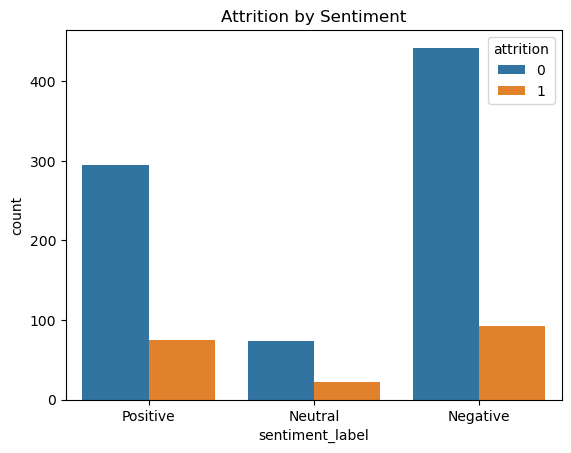

In [12]:
# Step 8: Attrition vs Sentiment
sns.countplot(x="sentiment_label", hue="attrition", data=df, order=["Positive","Neutral","Negative"])
plt.title("Attrition by Sentiment")
plt.show()

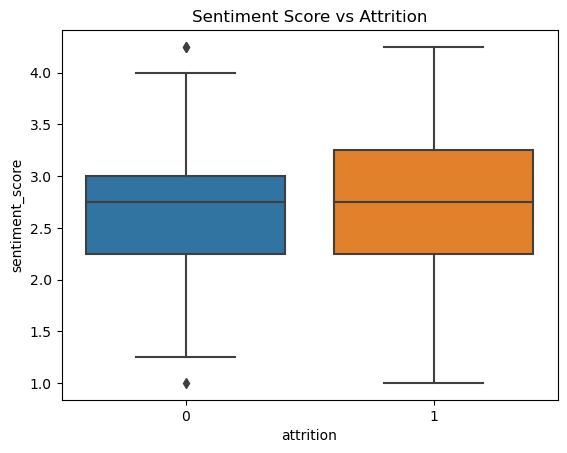

In [13]:
# Step 9: Sentiment Score Distribution by Attrition
sns.boxplot(x="attrition", y="sentiment_score", data=df)
plt.title("Sentiment Score vs Attrition")
plt.show()


In [14]:

# Step 10: Quick insight
attrition_by_sentiment = df.groupby('sentiment_label')['attrition'].mean() * 100
print("Attrition rate by sentiment (%):")
print(attrition_by_sentiment)

Attrition rate by sentiment (%):
sentiment_label
Negative    17.228464
Neutral     22.916667
Positive    20.270270
Name: attrition, dtype: float64
